# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Determinación-de-los-parámetros-de-los-polarizadores-lineales" data-toc-modified-id="Determinación-de-los-parámetros-de-los-polarizadores-lineales-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Determinación de los parámetros de los polarizadores lineales</a></div><div class="lev2 toc-item"><a href="#Cargar-la-intensidad-con-P1-y-P4" data-toc-modified-id="Cargar-la-intensidad-con-P1-y-P4-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Cargar la intensidad con P1 y P4</a></div><div class="lev2 toc-item"><a href="#Fitting-data-to-sine" data-toc-modified-id="Fitting-data-to-sine-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Fitting data to sine</a></div><div class="lev2 toc-item"><a href="#Calibration-parameters" data-toc-modified-id="Calibration-parameters-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Calibration parameters</a></div><div class="lev1 toc-item"><a href="#Otros-ajustes" data-toc-modified-id="Otros-ajustes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Otros ajustes</a></div><div class="lev2 toc-item"><a href="#Fitting-to-matrices---1:-sencillo" data-toc-modified-id="Fitting-to-matrices---1:-sencillo-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Fitting to matrices - 1: sencillo</a></div><div class="lev2 toc-item"><a href="#Ajuste-global:-p0,-p1,-angulo" data-toc-modified-id="Ajuste-global:-p0,-p1,-angulo-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Ajuste global: p0, p1, angulo</a></div><div class="lev3 toc-item"><a href="#Verificación" data-toc-modified-id="Verificación-221"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Verificación</a></div><div class="lev3 toc-item"><a href="#Comparación" data-toc-modified-id="Comparación-222"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Comparación</a></div><div class="lev3 toc-item"><a href="#Conclusión" data-toc-modified-id="Conclusión-223"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Conclusión</a></div>

# Determinación de los parámetros del divisor de haz usando dos polarizadores

**Autor**: Jesús del Hoyo

**Fecha**:   22/08/2018

**Objetivo**: Ecograb project, polariscope callibration

**Configuración**:

1. Diodo láser de Roithner .... de longitud de onda $\lambda$=850 nm (corriente = 314 mA).
1. Lente colimadora de Thorlabs DG10-600-B.
1. Difusor.
1. Polarizador 1 LPNIRE100-B (P1).
1. Polarizador 4 LPNIRE100-B (P2).

We assume that polarizers do not present depolarization and then, Jones Matrix formalism is valid, with $J_{xy} = J_{yx} = 0$:

\begin{equation}
J_P(0)=\left[\begin{array}{cc}
p_1 & 0  \\
0 & p_2
\end{array}\right]
\end{equation}

**1st experiment**:
1. Polarizador 1 LPNIRE100-B (P1).
1. Polarizador 1 LPNIRE100-B (P2).

Important: This experiment is repeated three times changing alternatively P1 and P2 by another polarizer P3. In this way, we can discriminate P1 and P2 (and P3) Jones matrices, so we eliminate the assumption P1 = P2.

Variables: 
1. 1D, second polarizer rotation

Parameters that can be extracted from fit:
1. P1 and P2 (and P3) Jones matrices.

**2nd experiment**:
1. Polarizador 1 LPNIRE100-B (P1).
1. Polarizador de eje conocido.

Variables: 
1. 1D, P1 rotation

Parameters that can be extracted from fit:
1. Theta 0 of P1. This will be our 0 reference of angles.

Then we repeat 1st experiment with P1 and P2 so we find out Th0 of P2.


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from __future__ import print_function

import time
import pprint

from numpy import array, matrix, matmul, power, sum, size, zeros
from math import sin, cos, pi, sqrt
from cmath import exp

from phyton_optics import degrees , sp, plt

from scipy import optimize
from scipy.io import loadmat

from polarimeter.utils import plot_experiment_residuals_1D, plot_2d
#from polarimeter.polarimeter import (get_polarimeter_parameters, intensity, 
#                                    polarimeter_matrices, get_light_parameters)

from phyton_optics.polarization_jones import rotation
from phyton_optics.polarization_stokes import polarizer_linear, rotate_mueller, polarized_light
from polarimeter.utils import dibujar_2d_fitting


from polarimeter.polarimeter import Intensity_Rotating_Elements
import phyton_optics.polarization_jones as pj
import phyton_optics.polarization_stokes as ps
import numpy as np
import os

## Load data

In [4]:
# Go to the desired folder
#dir = 'calibration'
print(os.getcwd())
#os.chdir(dir)

# Load file, Illumination maximum
filename = 'Intensidad_max_2018-09-27.npz'
data = np.load(filename)
# Rename variables
Iindividual = data['Iindividual']
Naverage = data['Naverage']

# Load file, Experiment IllumA
intensity_0 = np.array([-0.0243, 0.0217])
filename = 'Experimento_IlumA_2018-09-27.npz'
data = np.load(filename)
# Rename variables
angle_eIa = data['angle1']*degrees
I_eIa_double = data['intensity1'] - intensity_0

# Load file, Experiment IllumB
filename = 'Experimento_IlumB_2018-09-27.npz'
data = np.load(filename)
# Rename variables
angle_eIb = data['angle1']*degrees
I_eIb_double = data['intensity1'] - intensity_0

# Load file, IllumC
filename = 'Experimento_IlumC_2018-09-27.npz'
data = np.load(filename)
# Rename variables
angle_eIcx = data['angle2x']*degrees
angle_eIcy = data['angle2y']*degrees
I_eIc_double = data['intensity2'] - intensity_0

# Load file, IllumD
filename = 'Experimento_IlumD_2018-09-27.npz'
data = np.load(filename)
# Rename variables
angle_eIdx = data['angle2x']*degrees
angle_eIdy = data['angle2y']*degrees
I_eId_double = data['intensity2'] - intensity_0


# Load file, Experiment 1a
filename = 'Experimento_1a_2018-09-27.npz'
data = np.load(filename)
intensity_0 = np.array([-0.0295, 0.0217])
# Rename variables
angle_e1a = data['angle1']*degrees
I_e1a_double = data['intensity1'] - intensity_0

# Load file, Experiment 1b
filename = 'Experimento_1b_2018-09-27.npz'
data = np.load(filename)
# Rename variables
angle_e1b = data['angle1']*degrees
I_e1b_double = data['intensity1'] - intensity_0

# Load file, Experiment 1c
filename = 'Experimento_1c_2018-09-27.npz'
data = np.load(filename)
# Rename variables
angle_e1c = data['angle1']*degrees
I_e1c_double = data['intensity1'] - intensity_0


# Load file, Experiment 2
intensity_0 = np.array([-0.0243, 0.0217])
filename = 'Experimento_4_2018-09-27.npz'
data = np.load(filename)
# Rename variables
angle_e2x = data['angle2x']*degrees
angle_e2y = data['angle2y']*degrees
I_e2_double = data['intensity2'] - intensity_0


# Load file, Experiment 3a
intensity_0 = np.array([-0.0295, 0.0217])
filename = 'Experimento_5a_2018-09-27.npz'
data = np.load(filename)
# Rename variables
angle_e3ax = data['angle2x']*degrees
angle_e3ay = data['angle2y']*degrees
I_e3a_double = data['intensity2'] - intensity_0

# Load file, Experiment 3b
filename = 'Experimento_5b_2018-09-27.npz'
data = np.load(filename)
# Rename variables
angle_e3bx = data['angle2x']*degrees
angle_e3by = data['angle2y']*degrees
I_e3b_double = data['intensity2'] - intensity_0

D:\Codigo_UCM\polarimeter\notebooks\calibration\calibration 9


## Illumination 1

First, we have to calculate the maximum intensity and its dependence with the reference signal.

Text(0.5,1,'Ratio PhD2 / PhD1')

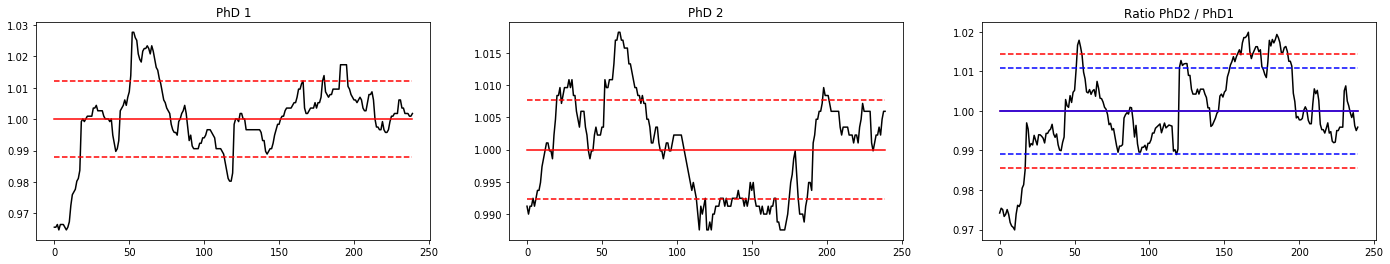

In [5]:
# make stadistics
ratio_individual = Iindividual[:,0] / Iindividual[:,1]
mean = np.mean(Iindividual, axis=0)
error = np.std(Iindividual, axis=0)
ratio1 = mean[0] / mean[1]
ratio_error1 = ratio1 * sqrt((error[0]/mean[0])**2 + (error[1]/mean[1])**2)
ratio2 = np.mean(ratio_individual)
ratio_error2 = np.std(ratio_individual)
# Fake plots
t = range(Naverage)
meanCh1y = np.ones(Naverage)*mean[0]
meanCh1yUp = np.ones(Naverage)*(mean[0]+error[0])
meanCh1yDown = np.ones(Naverage)*(mean[0]-error[0])
meanCh2y = np.ones(Naverage)*mean[1]
meanCh2yUp = np.ones(Naverage)*(mean[1]+error[1])
meanCh2yDown = np.ones(Naverage)*(mean[1]-error[1])
meanRy1 = np.ones(Naverage)*ratio1
meanRyUp1 = np.ones(Naverage)*(ratio1+ratio_error1)
meanRyDown1 = np.ones(Naverage)*(ratio1-ratio_error1)
meanRy2 = np.ones(Naverage)*ratio2
meanRyUp2 = np.ones(Naverage)*(ratio2+ratio_error2)
meanRyDown2 = np.ones(Naverage)*(ratio2-ratio_error2)
# Plot it
plt.figure(figsize=(24, 4))       
plt.subplot(1,3,1)
plt.plot(t,Iindividual[:,0]/meanCh1y,'k')
#plt.hold(True)
plt.plot(t, meanCh1y/meanCh1y,'r')
plt.plot(t, meanCh1yUp/meanCh1y,'r--')
plt.plot(t, meanCh1yDown/meanCh1y,'r--')
plt.title('PhD 1')

plt.subplot(1,3,2)
plt.plot(t,Iindividual[:,1]/meanCh2y,'k')
#plt.hold(True)
plt.plot(t, meanCh2y/meanCh2y,'r')
plt.plot(t, meanCh2yUp/meanCh2y,'r--')
plt.plot(t, meanCh2yDown/meanCh2y,'r--')
plt.title('PhD 2')

plt.subplot(1,3,3)
plt.plot(t,ratio_individual/meanRy1,'k')
#plt.hold(True)
plt.plot(t, meanRy1/meanRy2,'r')
plt.plot(t, meanRyUp1/meanRy2,'r--')
plt.plot(t, meanRyDown1/meanRy2,'r--')
plt.plot(t, meanRy2/meanRy2,'b')
plt.plot(t, meanRyUp2/meanRy2,'b--')
plt.plot(t, meanRyDown2/meanRy2,'b--')
plt.title('Ratio PhD2 / PhD1')

The result is not as good as we would like, but as we have variations of $\pm$1%, we should be able to work with it. Let's see.

Now, I will process the intensity arrays so I have the final ones, normalized to the reference and all.

In [6]:
# Function to do it automatically
def clean_intensity(Iexp, Iref_mean, Nd):
    if Nd==1:
        Iclean = Iexp[:,0] * Iref_mean / (Iexp[:,1])
    else: 
        Iclean = Iexp[:,:,0] * Iref_mean / (Iexp[:,:,1])
    return Iclean

# Clean the experimental data
I_eIa = clean_intensity(I_eIa_double, mean[1], Nd=1)
I_eIb = clean_intensity(I_eIb_double, mean[1], Nd=1)
I_eIc = clean_intensity(I_eIc_double, mean[1], Nd=2)
I_eId = clean_intensity(I_eId_double, mean[1], Nd=2)

I_e1a = clean_intensity(I_e1a_double, mean[1], Nd=1)
I_e1b = clean_intensity(I_e1b_double, mean[1], Nd=1)
I_e1c = clean_intensity(I_e1c_double, mean[1], Nd=1)

I_e2 = clean_intensity(I_e2_double, mean[1], Nd=2)

I_e3a = clean_intensity(I_e3a_double, mean[1], Nd=2)
I_e3b = clean_intensity(I_e3b_double, mean[1], Nd=2)

# Create illumination stokes vector
Ifuente = ps.circular_light(intensity=mean[0])
print('Stokes vector of the illumination:')
print(Ifuente)

Stokes vector of the illumination:
[[5.93498751]
 [0.        ]
 [0.        ]
 [5.93498751]]


## Experiment 1: characterize 3 polarizers

This experiment aims to characterize the Jones matrix of three polarizers. We need to combine the information provided by all the experiments in order to obtain the matrices, so the optimization will be made at the same time for all of them.

In this case, we are not assuming that the three of them are exactly the same. In this way, we may find that small differences between them can be greatly enhanced if many other elements are introduced between them. Let's see.

The mean square error is: 0.0314136744642.
Fit parameters P1: p1 = 0.954376446993; p2 = 0.135571194578;
Fit parameters P2: p1 = 0.961487592882; p2 = 0.0966698898182;
Fit parameters P3: p1 = 0.971176595865; p2 = 0.0945088152877;
Fit angles: Th0a = 128.893662238; Th0b = 16.7320390855; Th0c = 53.7311119067;


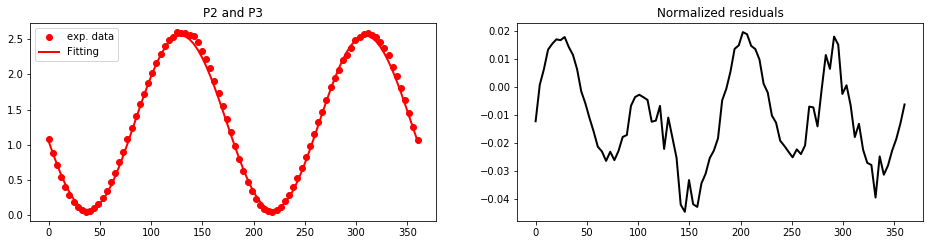

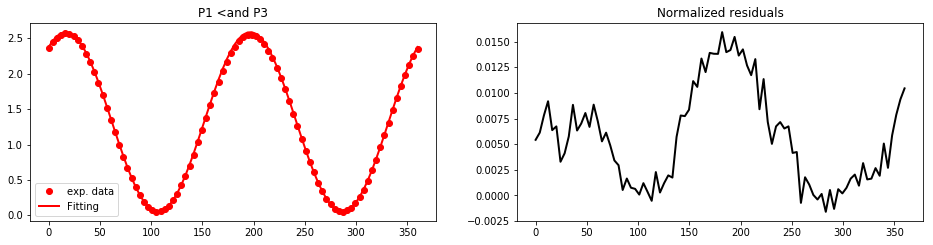

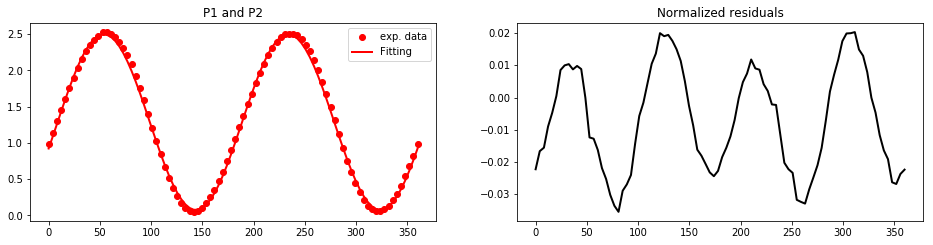

In [7]:
# Initial parameters
par0 = [.95, 0.15, .95, 0.15, .95, 0.15, 95*degrees, 45*degrees, 35*degrees]
# Define calculating and distance functions
def model_func1D(par, th1a, th1b, th1c): 
    # Create Jones matrices
    Jp1 = ps.polarizer_linear(p1=par[0], p2=par[1])
    Jp2 = ps.polarizer_linear(p1=par[2], p2=par[3])
    Jp3 = ps.polarizer_linear(p1=par[4], p2=par[5])
    # First, P3 and P1   
    J = [Jp3, Jp1]
    th = [th1a-par[6], 0]
    Ia = Intensity_Rotating_Elements(J, th, Ei = Ifuente)
    # Then, P3 and P2   
    J = [Jp3, Jp2]
    th = [0, th1b-par[7]]
    Ib = Intensity_Rotating_Elements(J, th, Ei = Ifuente)
    # Last, P1 and P2  
    J = [Jp1, Jp2]
    th = [th1c-par[8], 0]
    Ic = Intensity_Rotating_Elements(J, th, Ei = Ifuente)
    # End
    return (Ia, Ib, Ic)
def err_func1D(par, th1a, th1b, th1c, IRa, IRb, IRc, verbose=False): 
    (Ia, Ib, Ic) = model_func1D(par, th1a, th1b, th1c)
    dIa = Ia - IRa
    dIb = Ib - IRb
    dIc = Ic - IRc
    dI = np.concatenate((dIa, dIb, dIc))
    if verbose:
        error = sqrt(np.mean(dI**2))
        print('The mean square error is: {}.'.format(error))
    return dI
# Start optimization
#par1, success = optimize.leastsq(err_func1D, par0, args=(angle_e1a, angle_e1b, angle_e1c, I_e1a, I_e1b, I_e1c))
par1, success = optimize.leastsq(err_func1D, par0, args=(angle_e1a, angle_e1b, angle_e1c, I_e1a_double[:,0], I_e1b_double[:,0], I_e1c_double[:,0]))
_ = err_func1D(par1, angle_e1a, angle_e1b, angle_e1c, I_e1a_double[:,0], I_e1b_double[:,0], I_e1c_double[:,0], verbose=True)
# Print parameters
print('Fit parameters P1: p1 = {}; p2 = {};'.format(par1[0], par1[1] ))
print('Fit parameters P2: p1 = {}; p2 = {};'.format(par1[2], par1[3] ))
print('Fit parameters P3: p1 = {}; p2 = {};'.format(par1[4], par1[5] ))
print('Fit angles: Th0a = {}; Th0b = {}; Th0c = {};'.format((par1[6]/degrees)%180, (par1[7]/degrees)%180, (par1[8]/degrees)%180 ))
# Print results
(I_fitA, I_fitB, I_fitC) = model_func1D(par1, angle_e1a, angle_e1b, angle_e1c)
plot_experiment_residuals_1D(angle_e1a, I_e1a, I_fitA,  title='P2 and P3')
plot_experiment_residuals_1D(angle_e1b, I_e1b, I_fitB,  title='P1 <and P3')
plot_experiment_residuals_1D(angle_e1c, I_e1c, I_fitC,  title='P1 and P2')

Save the results:

In [8]:
# Polarizer parameters
(p11, p12, p21, p22) = (0.987890699132, 0.135571194578, 0.961487592882, 0.0966698898182)
(th0p1, th0p2) = (par1[8]%pi, par1[7]%pi)

## Experiment 2: Characterize one retarder

Now we have to fit the retarder parameters using what we measured for the polarizers. 

In [10]:
# Rename variables
angulox = angle_e2x
anguloy = angle_e2y
Iexperim = I_e2
# Initial parameters
Jp1 = ps.polarizer_linear(p11, p12)
Jp2 = ps.polarizer_linear(p21, p22)
par0 = [.95, 0.95, 90*degrees, 0, pi/4]
# Define calculating and distance functions
def model_func2D(par, th1, th2):
    # Jr = ps.diattenuating_retarder_deprecated(par[0], par[1], par[2])    # Funcion está mal
    #print(par)
    Jr = ps.Mueller_Real_Retarder(par[0], par[1], par[2])
    J = [Jp1, Jr, Jp2]
    th = [th1-par[4], par[3], th2]    
    I = Intensity_Rotating_Elements(J, th, Ifuente)
    print("Shape of th1:")
    print(th1.shape)
    print("Shape of th2:")
    print(th2.shape)
    print("Shape of I:")
    print(I.shape)
    return I
def err_func2D(par, th1, th2, y): 
    dI = model_func2D(par, th1, th2) - y 
    return dI.flatten()
# Optimize
par1, success = optimize.leastsq(err_func2D, par0, args=(angulox, anguloy, Iexperim))
# Print results
print('Fit parameters for the quarter waveplate: A = {}; B = {}; delta = {}º; Th0 = {}º;'.format(
        par1[0], par1[1], (par1[2]/degrees)%180, (par1[3]/degrees)%180 ))
print('Fit auxiliar angle = {}º;'.format((par1[4]/degrees)%180 ))
I_fitting = model_func2D(par1, angulox, anguloy)
Imax = Iexperim.max()
residuals = (Iexperim - I_fitting)/Imax
error = sqrt(np.mean(residuals**2))
print('The mean square error is: {}.'.format(error))
plt.figure(figsize=(20, 5))       
plt.subplot(1,3,1)
plot_2d(angulox, anguloy, Iexperim, title='Exerimental')    
plt.subplot(1,3,2)
plot_2d(angulox, anguloy, I_fitting, title='Fit')    
plt.subplot(1,3,3)
plot_2d(angulox, anguloy, residuals, title='Normalized residuals')

Shape of th1:
(15L,)
Shape of th2:
(14L,)
Shape of I:
(14L, 15L)


ValueError: operands could not be broadcast together with shapes (14,15) (15,14) 

Repeat it with polarizers that include delay in its leak.

Fit parameters for the quarter waveplate: A = 0.969210071099; B = 0.988802269066; delta = 84.8995081805º; Th0 = 147.255813332º;
First polarizer parameters: Delay = 86.7590795861; Th0 = 79.2464303774º;
The mean square error is: 0.044240694922.


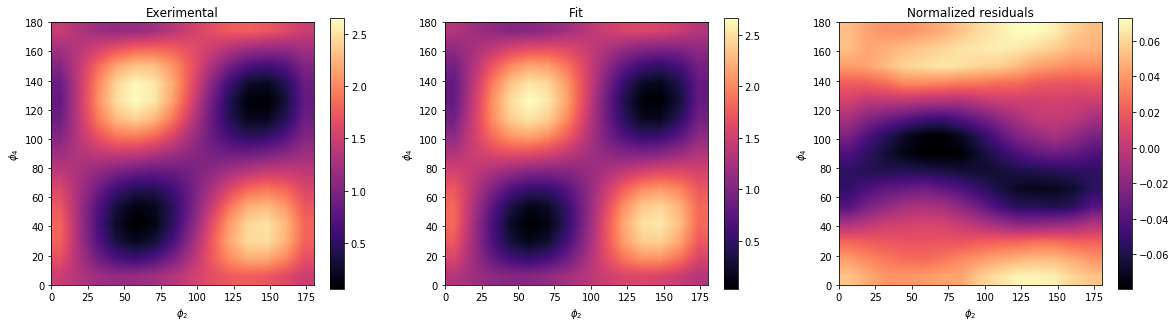

In [14]:
# Rename variables
angulox = angle_e2x
anguloy = angle_e2y
Iexperim = I_e2
# Initial parameters
Jp2 = ps.polarizer_linear(p21, p22)
par0 = [.95, 0.95, 90*degrees, 0, 0, pi/4]
# Define calculating and distance functions
def model_func2D(par, th1, th2):
    # Jr = ps.diattenuating_retarder_deprecated(par[0], par[1], par[2])    # Funcion está mal
    #print(par)
    Jr = ps.Mueller_Real_Retarder(par[0], par[1], par[2])
    Jp1 = ps.Mueller_Real_Retarder(p11, p12, par[4])
    J = [Jp1, Jr, Jp2]
    th = [th1-par[5], par[3], th2]
    I = Intensity_Rotating_Elements(J, th, Ifuente)
    return I
def err_func2D(par, th1, th2, y): 
    dI = model_func2D(par, th1, th2) - y 
    return dI.flatten()
# Optimize
par1, success = optimize.leastsq(err_func2D, par0, args=(angulox, anguloy, Iexperim))
#par1[4] = 70*degrees
# Print results
print('Fit parameters for the quarter waveplate: A = {}; B = {}; delta = {}º; Th0 = {}º;'.format(
        par1[0], par1[1], (par1[2]/degrees)%180, (par1[3]/degrees)%180 ))
print('First polarizer parameters: Delay = {}; Th0 = {}º;'.format((par1[4]/degrees)%180, (par1[5]/degrees)%180 ))
I_fitting = model_func2D(par1, angulox, anguloy)
Imax = Iexperim.max()
residuals = (Iexperim - I_fitting)/Imax
error = sqrt(np.mean(residuals**2))
print('The mean square error is: {}.'.format(error))
plt.figure(figsize=(20, 5))       
plt.subplot(1,3,1)
plot_2d(angulox, anguloy, Iexperim, title='Exerimental')    
plt.subplot(1,3,2)
plot_2d(angulox, anguloy, I_fitting, title='Fit')    
plt.subplot(1,3,3)
plot_2d(angulox, anguloy, residuals, title='Normalized residuals')

For now, lets use these parameters.

In [15]:
parR1 = [0.969210071099, 0.988802269066, 84.8995081805*degrees]
delay1 = 86.7590795861*degrees

## Illumination 2

Once characterized the polarizer and the retarder, let's fit the light source. Ideally, we should make a loop that should converge quickly. This is going to be the first step.

[5.934987513379505, 0, 0, 5.934987513379505, 0.0]
Fit parameters for the light source:
[ 6.01918462 -0.46138922  0.14173332 -5.99980126]
Th0 = 5.58743926128º;
The mean square error is: 0.00984751079894.


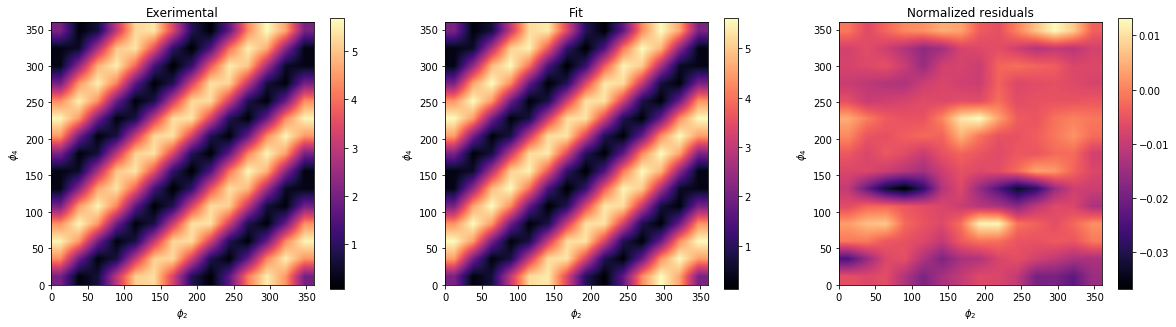

In [16]:
# Rename variables
angulox = angle_eIcx
anguloy = angle_eIcy
Iexperim = I_eIc
#Iexperim = I_eIc_double[:,:,0]
# Initial parameters
Jp1 = ps.Mueller_Real_Retarder(p11, p12, delay1)
Jr1 =ps.Mueller_Real_Retarder(parR1[0], parR1[1], parR1[2])
J = [Jr1, Jp1]
par0 = [mean[0], 0, 0, mean[0], 0.]
print(par0)
# Define calculating and distance functions
def model_func2D(par, th1, th2):
    # Jr = ps.diattenuating_retarder_deprecated(par[0], par[1], par[2])    # Funcion está mal
    #print(par)    
    # Algorithm may try to use nonreal Stokes vectors, make them real
    Itotal = sqrt(par[1]**2 + par[2]**2 + par[3]**2)
    if Itotal > par[0]:
        par[0] = Itotal
    Itest = np.matrix(np.array([[par[0]], [par[1]], [par[2]], [par[3]]]))
    th = [th1-par[4], th2]
    I = Intensity_Rotating_Elements(J, th, Itest)
    return I
def err_func2D(par, th1, th2, y): 
    dI = model_func2D(par, th1, th2) - y 
    return dI.flatten()
# Optimize
par1, success = optimize.leastsq(err_func2D, par0, args=(angulox, anguloy, Iexperim))
#par1[4] = 70*degrees
# Print results
print('Fit parameters for the light source:')
print(par1[0:4])
print('Th0 = {}º;'.format((par1[4]/degrees)%180 ))
I_fitting = model_func2D(par1, angulox, anguloy)
Imax = Iexperim.max()
residuals = (Iexperim - I_fitting)/Imax
error = sqrt(np.mean(residuals**2))
print('The mean square error is: {}.'.format(error))
plt.figure(figsize=(20, 5))       
plt.subplot(1,3,1)
plot_2d(angulox, anguloy, Iexperim, title='Exerimental')    
plt.subplot(1,3,2)
plot_2d(angulox, anguloy, I_fitting, title='Fit')    
plt.subplot(1,3,3)
plot_2d(angulox, anguloy, residuals, title='Normalized residuals')

Ok, we have our source calibrated. Repeat the calibration of both polarizers and retarder to check if the result is similar enough or not.

As we have a little problem knowing exactly which are the exact reference angle, I will use the angle of the elipse of the illumination as a parameter.

In [17]:
# Array de la fuente
Ifuente = np.matrix(np.array([[par1[0]], [par1[1]], [par1[2]], [par1[3]]]))

The mean square error is: 0.0269191145875.
Fit parameters P1: p1 = 0.967090127135; p2 = 0.104019516019;
Fit parameters P2: p1 = 0.963735779059; p2 = 0.0987469886847;
Fit parameters P3: p1 = 0.977026799788; p2 = 0.0896270735863;
Fit angles: Th0a = 126.821136995; Th0b = 16.3725733904; Th0c = 51.6367301786; ThFuente = 60.3781930512


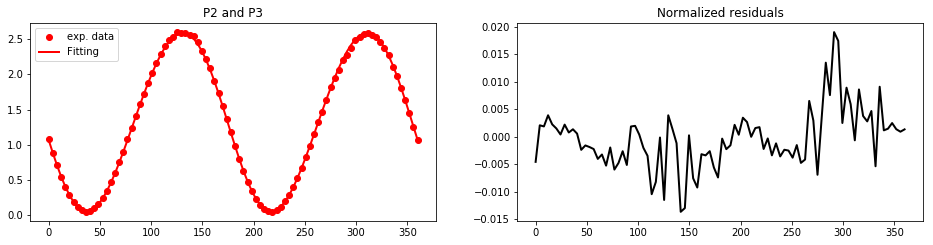

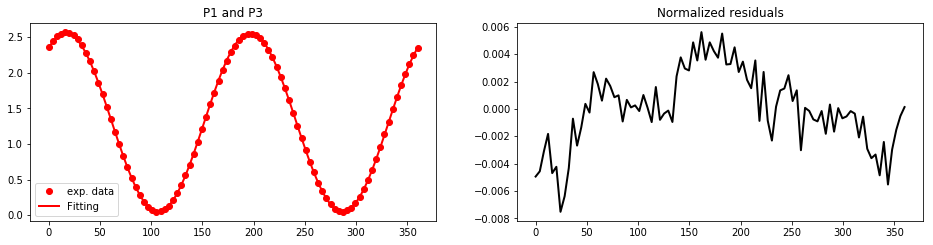

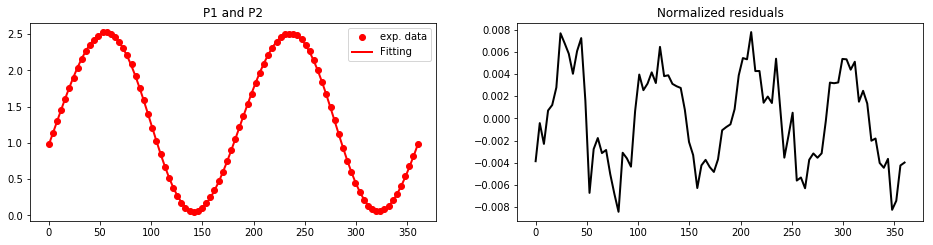

In [18]:
# Initial parameters
par0 = [.95, 0.15, .95, 0.15, .95, 0.15, 0*degrees, 0*degrees, 0*degrees, 0*degrees]
# Define calculating and distance functions
def model_func1D(par, th1a, th1b, th1c): 
    # Illumination elipse angle
    Ilin = sqrt(Ifuente[0]**2 - Ifuente[3]**2)
    IfuenteRot = np.matrix(np.array([[Ifuente.item(0)], [Ilin*cos(2*par[9])], [Ilin*sin(2*par[9])], [Ifuente.item(3)]]))
    #print(IfuenteRot)
    #IfuenteRot = Ifuente
    # Create Jones matrices
    Jp1 = ps.polarizer_linear(p1=par[0], p2=par[1])
    Jp2 = ps.polarizer_linear(p1=par[2], p2=par[3])
    Jp3 = ps.polarizer_linear(p1=par[4], p2=par[5])
    # First, P3 and P1   
    J = [Jp3, Jp1]
    th = [th1a-par[6], 0]
    Ia = Intensity_Rotating_Elements(J, th, Ei = IfuenteRot)
    # Then, P3 and P2   
    J = [Jp3, Jp2]
    th = [0, th1b-par[7]]
    Ib = Intensity_Rotating_Elements(J, th, Ei = IfuenteRot)
    # Last, P1 and P2  
    J = [Jp1, Jp2]
    th = [th1c-par[8], 0]
    Ic = Intensity_Rotating_Elements(J, th, Ei = IfuenteRot)
    # End
    return (Ia, Ib, Ic)
def err_func1D(par, th1a, th1b, th1c, IRa, IRb, IRc, verbose=False): 
    (Ia, Ib, Ic) = model_func1D(par, th1a, th1b, th1c)
    dIa = Ia - IRa
    dIb = Ib - IRb
    dIc = Ic - IRc
    dI = np.concatenate((dIa, dIb, dIc))
    if verbose:
        error = sqrt(np.mean(dI**2))
        print('The mean square error is: {}.'.format(error))
    return dI
# Start optimization
par1, success = optimize.leastsq(err_func1D, par0, args=(angle_e1a, angle_e1b, angle_e1c, I_e1a, I_e1b, I_e1c))
#par1, success = optimize.leastsq(err_func1D, par0, args=(angle_e1a, angle_e1b, angle_e1c, I_e1a_double[:,0], I_e1b_double[:,0], I_e1c_double[:,0]))
_ = err_func1D(par1, angle_e1a, angle_e1b, angle_e1c, I_e1a_double[:,0], I_e1b_double[:,0], I_e1c_double[:,0], verbose=True)
# Print parameters
print('Fit parameters P1: p1 = {}; p2 = {};'.format(par1[0], par1[1] ))
print('Fit parameters P2: p1 = {}; p2 = {};'.format(par1[2], par1[3] ))
print('Fit parameters P3: p1 = {}; p2 = {};'.format(par1[4], par1[5] ))
print('Fit angles: Th0a = {}; Th0b = {}; Th0c = {}; ThFuente = {}'.format(
    (par1[6]/degrees)%180, (par1[7]/degrees)%180, (par1[8]/degrees)%180, (par1[9]/degrees)%180 ))
# Print results
(I_fitA, I_fitB, I_fitC) = model_func1D(par1, angle_e1a, angle_e1b, angle_e1c)
plot_experiment_residuals_1D(angle_e1a, I_e1a, I_fitA,  title='P2 and P3')
plot_experiment_residuals_1D(angle_e1b, I_e1b, I_fitB,  title='P1 and P3')
plot_experiment_residuals_1D(angle_e1c, I_e1c, I_fitC,  title='P1 and P2')

In [19]:
# Recalculate the light source
Th0source = 60.3781930512*degrees
Ilin = sqrt(Ifuente[0]**2 - Ifuente[3]**2)
IfuenteRot = np.matrix(np.array([[Ifuente.item(0)], [Ilin*cos(2*Th0source)], [Ilin*sin(2*Th0source)], [Ifuente.item(3)]]))
# New polarizer parameters
(p11, p12, p21, p22, p31, p32) = (par1[0], par1[1], par1[2], par1[3], par1[4], par1[5])

Fit parameters for the quarter waveplate: A = 0.981055837548; B = 1.00103926309; delta = 84.1888563718º; Th0 = 148.03915937º;
First polarizer parameters: Delay = 96.2246955921; Th0 = 64.8120121522º;
Source parameters: Th0Fuente = 106.156808806º; Coef de pol lineal = 0.7189773909;
[[ 6.01918462]
 [-0.60763282]
 [-0.38433169]
 [ 5.97609028]]
The mean square error is: 0.0058015860539.


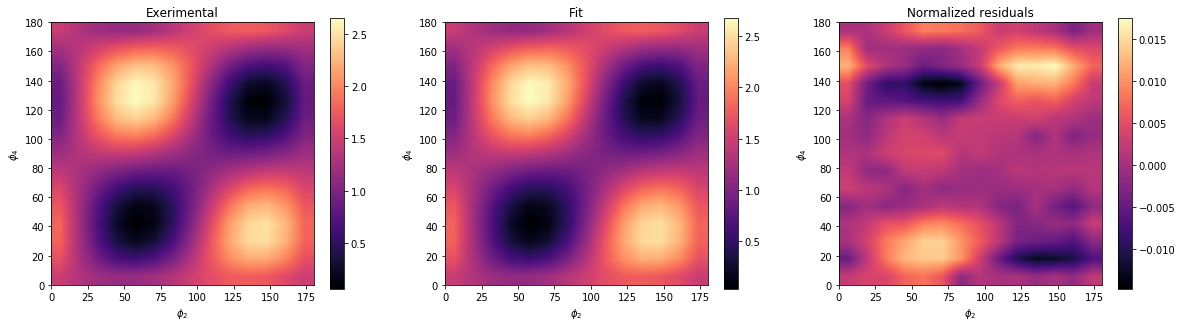

In [26]:
# Rename variables
angulox = angle_e2x
anguloy = angle_e2y
Iexperim = I_e2
# Initial parameters
Jp2 = ps.polarizer_linear(p21, p22)
par0 = [.95, 0.95, 90*degrees, 0, 0, pi/4, 0, 0.5]
# Define calculating and distance functions
def model_func2D(par, th1, th2):
    # Jr = ps.diattenuating_retarder_deprecated(par[0], par[1], par[2])    # Funcion está mal
    #print(par)
    IfuenteRot = np.matrix(np.array([[Ifuente.item(0)], [par[7]*cos(2*par[6])], [par[7]*sin(2*par[6])], [sqrt(Ifuente.item(0)**2 - par[7]**2)]]))
    Jr = ps.Mueller_Real_Retarder(par[0], par[1], par[2])
    Jp1 = ps.Mueller_Real_Retarder(p11, p12, par[4])
    J = [Jp1, Jr, Jp2]
    th = [th1-par[5], par[3], th2]
    I = Intensity_Rotating_Elements(J, th, IfuenteRot)
    return I
def err_func2D(par, th1, th2, y): 
    dI = model_func2D(par, th1, th2) - y 
    return dI.flatten()
# Optimize
par1, success = optimize.leastsq(err_func2D, par0, args=(angulox, anguloy, Iexperim))
#par1[4] = 70*degrees
# Print results
print('Fit parameters for the quarter waveplate: A = {}; B = {}; delta = {}º; Th0 = {}º;'.format(
        par1[0], par1[1], (par1[2]/degrees)%180, (par1[3]/degrees)%180 ))
print('First polarizer parameters: Delay = {}; Th0 = {}º;'.format((par1[4]/degrees)%180, (par1[5]/degrees)%180 ))
print('Source parameters: Th0Fuente = {}º; Coef de pol lineal = {};'.format( (par1[6]/degrees)%180, par1[7] ))
IfuenteRot = np.matrix(np.array([[Ifuente.item(0)], [par1[7]*cos(2*par1[6])], [par1[7]*sin(2*par1[6])], [sqrt(Ifuente.item(0)**2 - par1[7]**2)]]))
print(IfuenteRot)
I_fitting = model_func2D(par1, angulox, anguloy)
Imax = Iexperim.max()
residuals = (Iexperim - I_fitting)/Imax
error = sqrt(np.mean(residuals**2))
print('The mean square error is: {}.'.format(error))
plt.figure(figsize=(20, 5))       
plt.subplot(1,3,1)
plot_2d(angulox, anguloy, Iexperim, title='Exerimental')    
plt.subplot(1,3,2)
plot_2d(angulox, anguloy, I_fitting, title='Fit')    
plt.subplot(1,3,3)
plot_2d(angulox, anguloy, residuals, title='Normalized residuals')

In [21]:
# Save parameters
parR1 = par1[0:3]
Jr1 = ps.Mueller_Real_Retarder(parR1[0], parR1[1], parR1[2])
delay1 = 96.224695665*degrees
Jp1 = ps.Mueller_Real_Retarder(p11, p12, delay1)

The result is very good. Let's try to analyze the source and see if we can have the same result we are fitting.

[5.934987513379505, 0, 0, 5.934987513379505, 0.0]
Fit parameters for the light source:
[ 5.98755309 -0.45470551  0.13822116 -5.93294174]
Th0 = 5.57325197038º;
The mean square error is: 0.00733956953264.


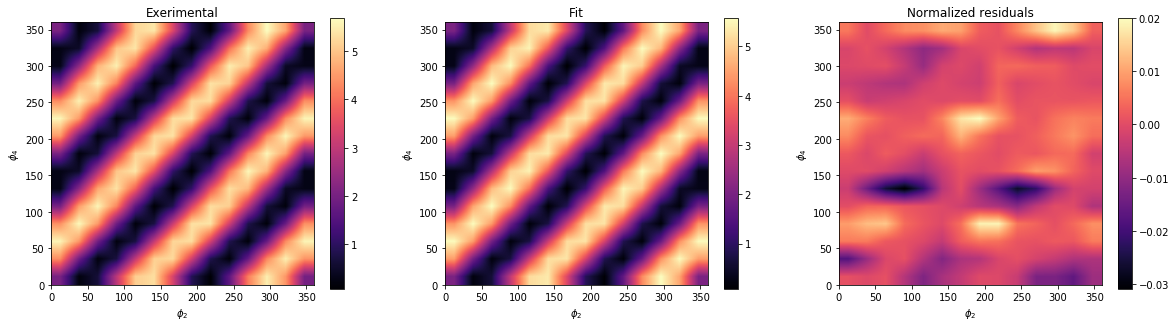

In [28]:
# Rename variables
angulox = angle_eIcx
anguloy = angle_eIcy
Iexperim = I_eIc
#Iexperim = I_eIc_double[:,:,0]
# Initial parameters
Jp3 = ps.Mueller_Real_Retarder(p31, p32, delay1)
Jr1 =ps.Mueller_Real_Retarder(parR1[0], parR1[1], parR1[2])
J = [Jr1, Jp3]
par0 = [mean[0], 0, 0, mean[0], 0.]
print(par0)
# Define calculating and distance functions
def model_func2D(par, th1, th2):
    # Jr = ps.diattenuating_retarder_deprecated(par[0], par[1], par[2])    # Funcion está mal
    #print(par)    
    # Algorithm may try to use nonreal Stokes vectors, make them real
    Itotal = sqrt(par[1]**2 + par[2]**2 + par[3]**2)
    if Itotal > par[0]:
        par[0] = Itotal
    Itest = np.matrix(np.array([[par[0]], [par[1]], [par[2]], [par[3]]]))
    th = [th1-par[4], th2]
    I = Intensity_Rotating_Elements(J, th, Itest)
    return I
def err_func2D(par, th1, th2, y): 
    dI = model_func2D(par, th1, th2) - y 
    return dI.flatten()
# Optimize
par1, success = optimize.leastsq(err_func2D, par0, args=(angulox, anguloy, Iexperim))
#par1[4] = 70*degrees
# Print results
print('Fit parameters for the light source:')
print(par1[0:4])
print('Th0 = {}º;'.format((par1[4]/degrees)%180 ))
I_fitting = model_func2D(par1, angulox, anguloy)
Imax = Iexperim.max()
residuals = (Iexperim - I_fitting)/Imax
error = sqrt(np.mean(residuals**2))
print('The mean square error is: {}.'.format(error))
plt.figure(figsize=(20, 5))       
plt.subplot(1,3,1)
plot_2d(angulox, anguloy, Iexperim, title='Exerimental')    
plt.subplot(1,3,2)
plot_2d(angulox, anguloy, I_fitting, title='Fit')    
plt.subplot(1,3,3)
plot_2d(angulox, anguloy, residuals, title='Normalized residuals')
# Array de la fuente
Ifuente = np.matrix(np.array([[par1[0]], [par1[1]], [par1[2]], [par1[3]]]))

Not the same, but close enough. I will take it and use it for the last experiment.

## Experiment 3: Two retarders

Now let's fit the second retarder, and then use its information for fitting the same experiment with the second polarizer rotated 90º.

In [34]:
# Rename variables
angulox = angle_e3ax
anguloy = angle_e3ay
Iexperim = I_e3a
# Initial parameters
par0 = [.95, 0.95, 90*degrees, 0, 0, 0*degrees, 0, 0.5]
(p11, p12, p21, p22, delay1) = (0.967090127135, 0.104019516019, 0.963735779059,0.0987469886847, 96.224695665*degrees)
parR1 = [0.981055837469, 1.00103926315, 84.1888563685*degrees]
Jr1 = ps.Mueller_Real_Retarder(parR1[0], parR1[1], parR1[2])
Jp1 = ps.Mueller_Real_Retarder(p11, p12, delay1)
# Define calculating and distance functions
def model_func2D(par, th1, th2):
    # Jr = ps.diattenuating_retarder_deprecated(par[0], par[1], par[2])    # Funcion está mal
    print(par)
    #print(IfuenteRot)
    IfuenteRot = np.matrix(np.array([[Ifuente.item(0)], [par[7]], [0], [sqrt(Ifuente.item(0)**2 - par[7]**2)]])) #math domain error
    IfuenteRot = ps.rotate_stokes(IfuenteRot, par[6])
    Jr2 = ps.Mueller_Real_Retarder(par[0], par[1], par[2])
    J = [Jp1, Jr1, Jr2, Jp2]
    th = [0, th1-par[3], th2-par[4], 0-par[5]]
    I = Intensity_Rotating_Elements(J, th, IfuenteRot)
    return I
def err_func2D(par, th1, th2, y): 
    dI = model_func2D(par, th1, th2) - y 
    return dI.flatten()
# Optimize
par1, success = optimize.leastsq(err_func2D, par0, args=(angulox, anguloy, Iexperim))
#par1[4] = 70*degrees
# Print results
print('Fit parameters for the quarter waveplate: A = {}; B = {}; delta = {}º;'.format(
        par1[0], par1[1], (par1[2]/degrees)%180 ))
print('Angles: Th0R1 = {}; Th0R2 = {}º;'.format((par1[3]/degrees)%180, (par1[4]/degrees)%180 ))
print('Source parameters: Th0P2 = {}º;'.format( (par1[5]/degrees)%180 ))
#print('Source parameters: Th0Fuente = {}º; Coef de pol lineal = {};'.format( (par1[6]/degrees)%180, par1[7] ))
#Plot results
I_fitting = model_func2D(par1, angulox, anguloy)
Imax = Iexperim.max()
residuals = (Iexperim - I_fitting)/Imax
error = sqrt(np.mean(residuals**2))
print('The mean square error is: {}.'.format(error))
plt.figure(figsize=(20, 5))       
plt.subplot(1,3,1)
plot_2d(angulox, anguloy, Iexperim, title='Exerimental')    
plt.subplot(1,3,2)
plot_2d(angulox, anguloy, I_fitting, title='Fit')    
plt.subplot(1,3,3)
plot_2d(angulox, anguloy, residuals, title='Normalized residuals')

[0.95       0.95       1.57079633 0.         0.         0.
 0.         0.5       ]
[0.95       0.95       1.57079633 0.         0.         0.
 0.         0.5       ]
[0.95       0.95       1.57079633 0.         0.         0.
 0.         0.5       ]
[0.95000001 0.95       1.57079633 0.         0.         0.
 0.         0.5       ]
[0.95       0.95000001 1.57079633 0.         0.         0.
 0.         0.5       ]
[0.95       0.95       1.57079635 0.         0.         0.
 0.         0.5       ]
[0.95       0.95       1.57079633 0.00000001 0.         0.
 0.         0.5       ]
[0.95       0.95       1.57079633 0.         0.00000001 0.
 0.         0.5       ]
[0.95       0.95       1.57079633 0.         0.         0.00000001
 0.         0.5       ]
[0.95       0.95       1.57079633 0.         0.         0.
 0.00000001 0.5       ]
[0.95       0.95       1.57079633 0.         0.         0.
 0.         0.50000001]
[  66.1558023    66.11948351    0.68422203  -15.09418937  -15.23283064
  -15.36

ValueError: math domain error

Final test: use all calculated values to fit experiment 3b data (same as above but with polarizers rotated 90º

In [24]:
# Rename variables
angulox = angle_e3bx
anguloy = angle_e3by
Iexperim = I_e3b
# Initial parameters
par0 = [.95, 0.95, 90*degrees, 0, 0, 0*degrees]
(p11, p12, p21, p22, delay1) = (0.967090127135, 0.104019516019, 0.963735779059,0.0987469886847, 96.224695665*degrees)
parR1 = [0.981055837469, 1.00103926315, 84.1888563685*degrees]
parR1 = [1.03591519043, 1.03819772895, 81.3198504164*degrees]
Jr1 = ps.Mueller_Real_Retarder(parR1[0], parR1[1], parR1[2])
Jr1 = ps.Mueller_Real_Retarder(parR2[0], parR2[1], parR2[2])
Jp1 = ps.Mueller_Real_Retarder(p11, p12, delay1)
Jp2 = ps.polarizer_linear(p21, p22)
# Define calculating and distance functions
def model_func2D(par, th1, th2):
    # Jr = ps.diattenuating_retarder_deprecated(par[0], par[1], par[2])    # Funcion está mal
    #print(par)
    #print(IfuenteRot)
    J = [Jp1, Jr1, Jr2, Jp2]
    th = [0, th1-par[3], th2-par[4], 90-par[5]]
    I = Intensity_Rotating_Elements(J, th, IfuenteRot)
    return I
def err_func2D(par, th1, th2, y): 
    dI = model_func2D(par, th1, th2) - y 
    return dI.flatten()
# Optimize
par1, success = optimize.leastsq(err_func2D, par0, args=(angulox, anguloy, Iexperim))
#par1[4] = 70*degrees
# Print results
print('Fit parameters for the quarter waveplate: A = {}; B = {}; delta = {}º;'.format(
        par1[0], par1[1], (par1[2]/degrees)%180 ))
print('Angles: Th0R1 = {}; Th0R2 = {}º;'.format((par1[3]/degrees)%180, (par1[4]/degrees)%180 ))
print('Source parameters: Th0P2 = {}º;'.format( (par1[5]/degrees)%180 ))
#Plot results
I_fitting = model_func2D(par1, angulox, anguloy)
Imax = Iexperim.max()
residuals = (Iexperim - I_fitting)/Imax
error = sqrt(np.mean(residuals**2))
print('The mean square error is: {}.'.format(error))
plt.figure(figsize=(20, 5))       
plt.subplot(1,3,1)
plot_2d(angulox, anguloy, Iexperim, title='Exerimental')    
plt.subplot(1,3,2)
plot_2d(angulox, anguloy, I_fitting, title='Fit')    
plt.subplot(1,3,3)
plot_2d(angulox, anguloy, residuals, title='Normalized residuals')

NameError: name 'parR2' is not defined

## Bonus: Measure depolarization

Let's see how depolarized is the source with the paper (but without the thorlabs difusor).

[5.934987513379505, 0, 0, 5.934987513379505, 0.0]
Fit parameters for the light source:
[ 3.02025054 -0.18615754  0.05531121 -2.2869018 ]
Th0 = 5.41676071157º; Polarization degree: 0.759914651165
The mean square error is: 0.00271456783157.


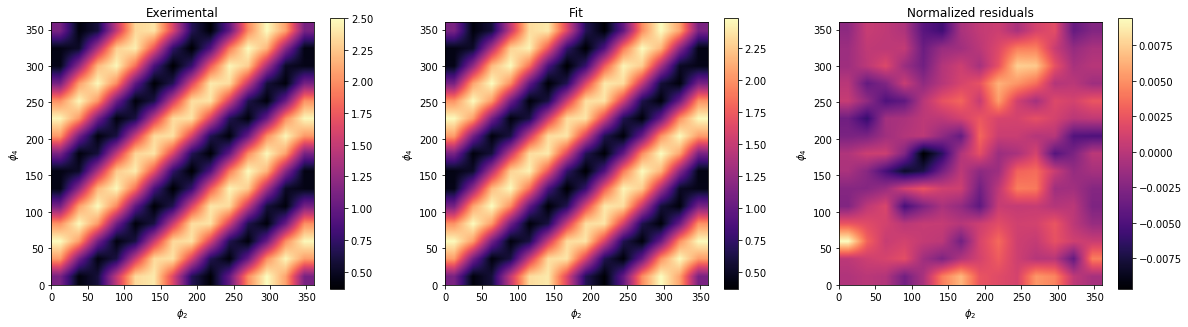

In [169]:
# Rename variables
angulox = angle_eIdx
anguloy = angle_eIdy
Iexperim = I_eId
#Iexperim = I_eIc_double[:,:,0]
# Initial parameters
Jp3 = ps.Mueller_Real_Retarder(p31, p32, delay1)
Jr1 =ps.Mueller_Real_Retarder(parR1[0], parR1[1], parR1[2])
J = [Jr1, Jp3]
par0 = [mean[0], 0, 0, mean[0], 0.]
print(par0)
# Define calculating and distance functions
def model_func2D(par, th1, th2):
    # Jr = ps.diattenuating_retarder_deprecated(par[0], par[1], par[2])    # Funcion está mal
    #print(par)    
    # Algorithm may try to use nonreal Stokes vectors, make them real
    Itotal = sqrt(par[1]**2 + par[2]**2 + par[3]**2)
    if Itotal > par[0]:
        par[0] = Itotal
    Itest = np.matrix(np.array([[par[0]], [par[1]], [par[2]], [par[3]]]))
    th = [th1-par[4], th2]
    I = Intensity_Rotating_Elements(J, th, Itest)
    return I
def err_func2D(par, th1, th2, y): 
    dI = model_func2D(par, th1, th2) - y 
    return dI.flatten()
# Optimize
par1, success = optimize.leastsq(err_func2D, par0, args=(angulox, anguloy, Iexperim))
degree_polarization = ps.degree_polarization(par1[0:4])
#par1[4] = 70*degrees
# Print results
print('Fit parameters for the light source:')
print(par1[0:4])
print('Th0 = {}º; Polarization degree: {}'.format((par1[4]/degrees)%180, degree_polarization ))
I_fitting = model_func2D(par1, angulox, anguloy)
Imax = Iexperim.max()
residuals = (Iexperim - I_fitting)/Imax
error = sqrt(np.mean(residuals**2))
print('The mean square error is: {}.'.format(error))
plt.figure(figsize=(20, 5))       
plt.subplot(1,3,1)
plot_2d(angulox, anguloy, Iexperim, title='Exerimental')    
plt.subplot(1,3,2)
plot_2d(angulox, anguloy, I_fitting, title='Fit')    
plt.subplot(1,3,3)
plot_2d(angulox, anguloy, residuals, title='Normalized residuals')

## Conclusion



I want to repeat this using true circular polarization for the light source, but I think we can consider these values as semi-definitive.